<a href="https://colab.research.google.com/github/sweyy/sweyy/blob/main/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##         **TITANIC SURVIVAL**

---



---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix

In [3]:
# loading the training dataset
data = pd.read_csv('/content/train.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Converting into DataFrame.
data = pd.DataFrame(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
data.shape

(891, 12)

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode(), inplace=True)

In [11]:
# checking the duplicates
data.duplicated().sum() # no duplicate values all are unique

0

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Data Exploration**

---



# **Survival Rate by Sex**

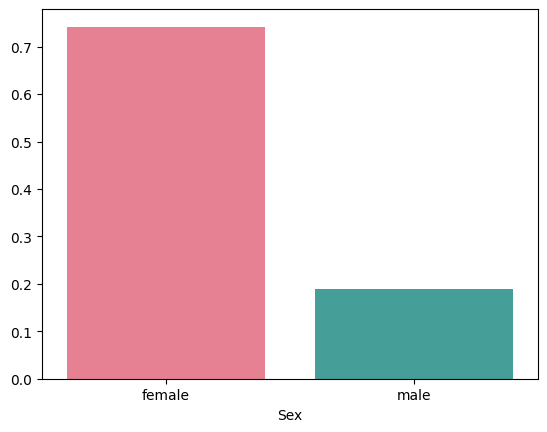

In [14]:
survival_rate_by_sex = data.groupby('Sex')['Survived'].mean().sort_values(ascending=False)
sns.barplot(data=data, x=survival_rate_by_sex.index, y=survival_rate_by_sex.values,
            palette='husl')
plt.show()


# **Survival rate by Age**

In [15]:
data.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# Defining the bin edges range from 0 to 80
bins = [0, 10, 20, 30, 40 , 50 , 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
# Cutting the data into bins
data['age_group'] = pd.cut(data['Age'], bins=bins, right=False, labels=labels, include_lowest=True)

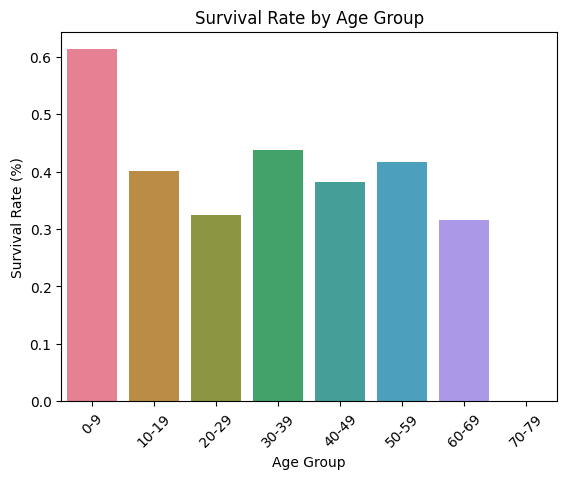

In [17]:
survival_rate_by_age = data.groupby('age_group')['Survived'].mean()
# Reset index to make sure 'age_group' is a column and not an index, which helps with Seaborn plotting
survival_rate_by_age_group = survival_rate_by_age.reset_index()

sns.barplot(x='age_group', y='Survived', data=survival_rate_by_age_group, palette='husl')

# Add labels and title to the plot
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Group')

# Rotate the x labels to show them clearly
plt.xticks(rotation=45)

# Show the plot
plt.show()

# **Survival rate by Fare**

In [18]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
# For calculating the survival rate we have to divide the fare into different range for better visualization.
fare_bins = [0, 50, 100, 200, 300, 400, 500, 600]
fare_labels = ['0-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-600']

data['FareRange'] = pd.cut(data['Fare'], bins=fare_bins, labels=fare_labels, right=False, include_lowest=True)

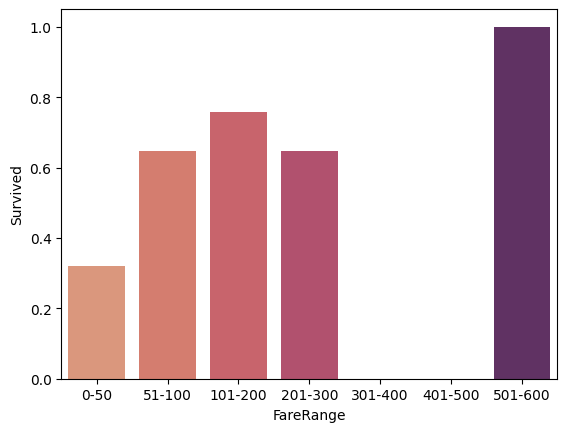

In [20]:
# survival rate by farerange
survival_rate_by_fare = data.groupby('FareRange')['Survived'].mean()
survival_rate_by_farerange = survival_rate_by_fare.reset_index()

sns.barplot(data=survival_rate_by_farerange, x='FareRange', y='Survived', palette='flare')
plt.show()

# **Survival rate by Embarked**

<Axes: xlabel='Embarked', ylabel='count'>

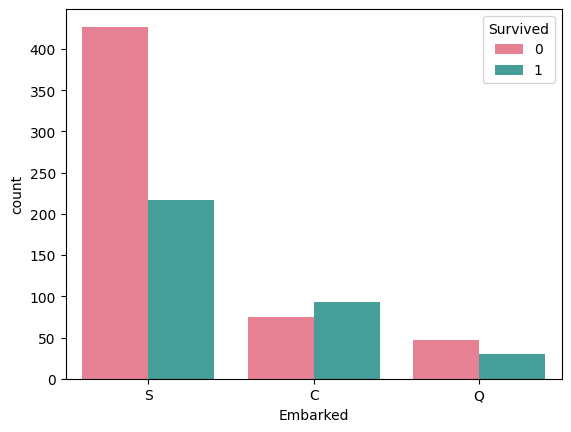

In [21]:
sns.countplot(x='Embarked', hue='Survived', palette='husl', data=data)


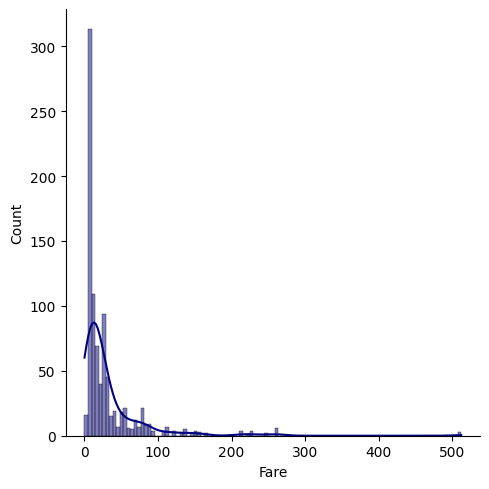

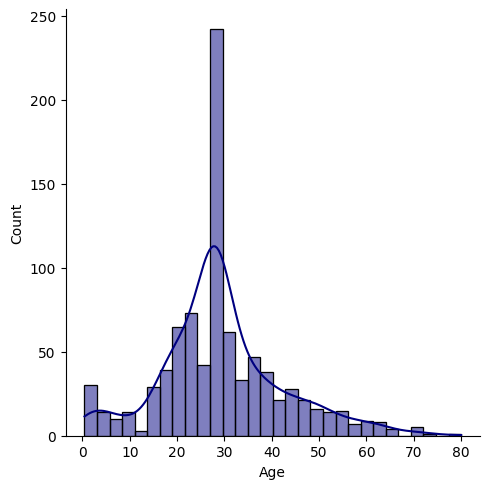

In [22]:
num_feature = ['Fare', 'Age']
for i in num_feature:
  sns.displot(data[i], kde=True, color='navy')
  plt.show()

# **Average Age by Sex**

<Axes: xlabel='Sex', ylabel='Age'>

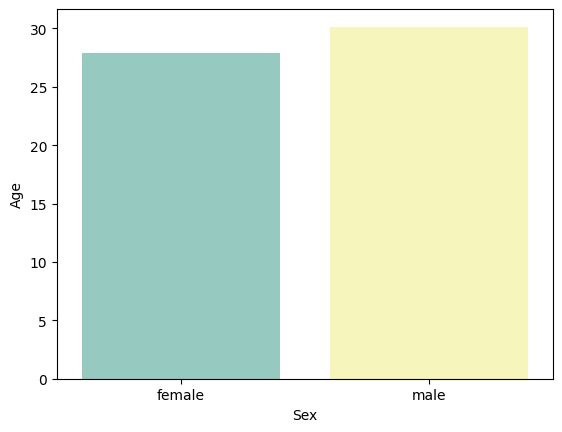

In [23]:
avg_age_by_sex = data.groupby('Sex')['Age'].mean().reset_index()
sns.barplot(x='Sex', y='Age', data=avg_age_by_sex, palette='Set3')

# **Survival rate by PClass**



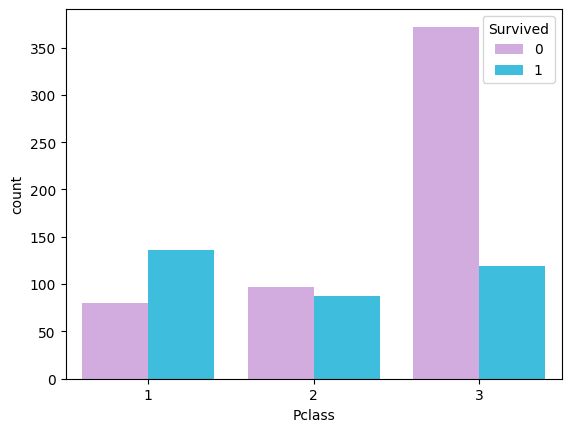

In [24]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette=['#D6A2E8', '#25CCF7'])
plt.show()

The survival rate of 3rd class is very low and made sense because we'd previously seen the reason behind this.



#1. **Fare, Pclass vs Survived**
#2. **Age, Sex or Survived**



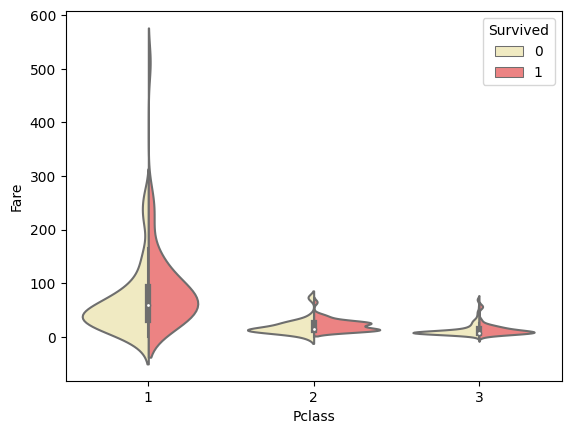

In [25]:
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=data, split=True, palette=['#F8EFBA', '#FD7272'])
plt.show()

Higher fares and a wider range are apparent in 1st class, especially among survivors, while 2nd and 3rd classes show less variation in fares.

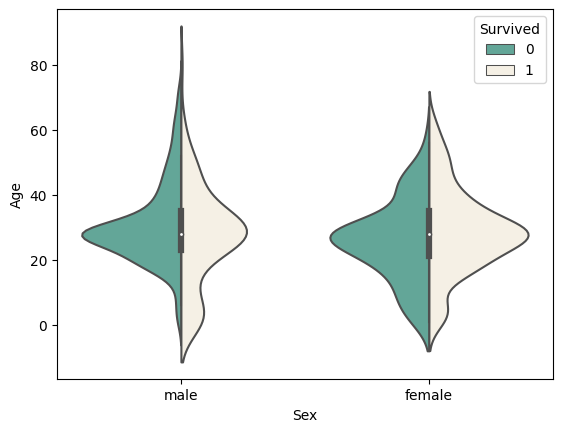

In [26]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, palette=['#58B19F', '#f7f1e3'])
plt.show()

For younger and older females, the survival proportion is relatively high compared to males of the same age group.

# *Family Size*

In [27]:
data['Familysize'] = data['SibSp'] + data['Parch'] + 1 # including the individuals as well

In [34]:
# Categorizing the family size
def family_size_cat(size):
  if size == 1:
    return 'Solo'
  elif 2 <= size <= 4:
    return 'Small'
  elif 5 <= size <= 7:
    return 'Medium'
  else:
    return 'Large'

data['FamilyCat'] = data['Familysize'].apply(family_size_cat)

In [35]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,FareRange,Familysize,FamilyCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,0-50,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,51-100,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,0-50,1,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39,51-100,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39,0-50,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20-29,0-50,1,Solo
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10-19,0-50,1,Solo
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,20-29,0-50,4,Small
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20-29,0-50,1,Solo


# **Survival rate by Family**

In [36]:
print(data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_group',
       'FareRange', 'Familysize', 'FamilyCat'],
      dtype='object')


In [37]:
data.columns = data.columns.str.replace(' ', '_')


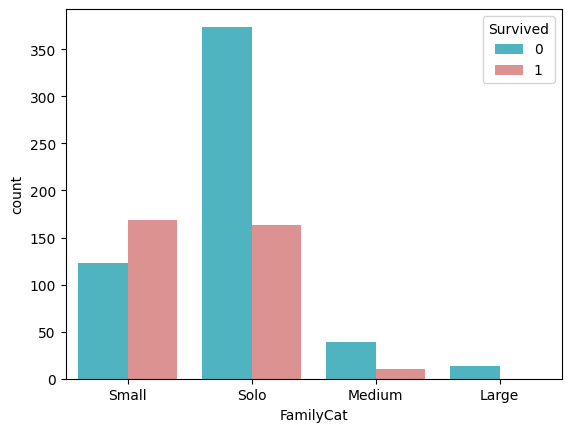

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='FamilyCat', hue='Survived', data=data, palette=['#3dc1d3', '#ea8685'])
plt.show()


<Axes: xlabel='FamilyCat', ylabel='count'>

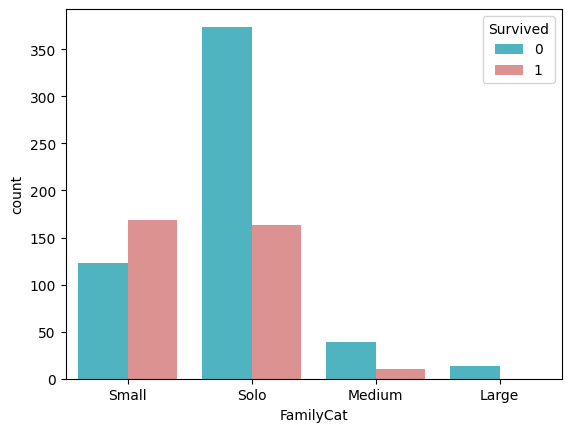

In [39]:
sns.countplot(x='FamilyCat', hue='Survived', data=data, palette=['#3dc1d3', '#ea8685'])



*  Solo travelers and those from large families had lower survival rates compared to those from small and medium families.
* This might indicate that having some family members provided a survival advantage, but having a large family could have presented challenges, possibly in securing space on lifeboats or in the ability to move quickly in an emergency situation.
* So this feature is crucial and we have to drop the other three columns SibSp , Parch and the family size.

---



---



# **The features with the greatest influence on survival rates are:**

**1**.   Age
**2**.   Pclass
**3**.   Embarktion
**4**.   Sex
**5**.   FamilyCat
**6**.   Fare



In [40]:
data.drop(['Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'Familysize', 'age_group', 'FareRange', 'PassengerId'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyCat
0,0,3,male,22.0,7.2500,S,Small
1,1,1,female,38.0,71.2833,C,Small
2,1,3,female,26.0,7.9250,S,Solo
3,1,1,female,35.0,53.1000,S,Small
4,0,3,male,35.0,8.0500,S,Solo
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Solo
887,1,1,female,19.0,30.0000,S,Solo
888,0,3,female,28.0,23.4500,S,Small
889,1,1,male,26.0,30.0000,C,Solo




---



---



# **Encoding**

In [41]:
data.replace({'female':1, 'male':0}, inplace=True)
data.shape

(891, 7)

In [42]:
le = LabelEncoder()
data['FamilyCat'] = le.fit_transform(data['FamilyCat'])
data

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyCat
0,0,3,0,22.0,7.2500,S,2
1,1,1,1,38.0,71.2833,C,2
2,1,3,1,26.0,7.9250,S,3
3,1,1,1,35.0,53.1000,S,2
4,0,3,0,35.0,8.0500,S,3
...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,S,3
887,1,1,1,19.0,30.0000,S,3
888,0,3,1,28.0,23.4500,S,2
889,1,1,0,26.0,30.0000,C,3


In [43]:
embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked').drop('Embarked_S', axis=1)
data = pd.concat([data, embarked_dummies], axis=1)
data

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyCat,Embarked_C,Embarked_Q
0,0,3,0,22.0,7.2500,S,2,0,0
1,1,1,1,38.0,71.2833,C,2,1,0
2,1,3,1,26.0,7.9250,S,3,0,0
3,1,1,1,35.0,53.1000,S,2,0,0
4,0,3,0,35.0,8.0500,S,3,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,S,3,0,0
887,1,1,1,19.0,30.0000,S,3,0,0
888,0,3,1,28.0,23.4500,S,2,0,0
889,1,1,0,26.0,30.0000,C,3,1,0


# **Spliting data into training and testing dataset**

In [44]:
X = data.drop(['Survived', 'Embarked'], axis=1)
y = data['Survived']
X

,Pclass,Sex,Age,Fare,FamilyCat,Embarked_C,Embarked_Q
0,3,0,22.0,7.2500,2,0,0
1,1,1,38.0,71.2833,2,1,0
2,3,1,26.0,7.9250,3,0,0
3,1,1,35.0,53.1000,2,0,0
4,3,0,35.0,8.0500,3,0,0
...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,3,0,0
887,1,1,19.0,30.0000,3,0,0
888,3,1,28.0,23.4500,2,0,0
889,1,0,26.0,30.0000,3,1,0


In [45]:
num_cols = ['Age', 'Fare']
scaler = StandardScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# **Modeling**

In [47]:
# Initializing

models ={
    'RandomForest':( RandomForestClassifier(), {'n_estimators':[50, 100, 200]}),
    'XGB': (XGBClassifier(), {'max_depth':[3, 5, 7]}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100, 200]}),
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth':[None, 10, 20, 30]}),
    'SVC':( SVC(), {'C': [0.1, 1, 10]}),
    # 'LogisticRegression': (LogisticRegression(), {'penalty':['l1', 'l2']}),
    'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators':[50, 100, 200]}),
    'KNN':(KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

# Defining the evaluation metric to use for hyperparameter tuning
scorer_name = 'F1-score'
scorer = make_scorer(f1_score)

# Training and evaluating each model using crossvalidation
for name, (model, param_grid) in models.items():
  grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)
  grid_search.fit(X_train, y_train)

  # Printing the best hyperparameter and corresponding score
  print(f'Best hyperparameter for {name} : {grid_search.best_params_}')
  print(f'Best {scorer_name} score : {grid_search.best_score_:.2%}')

  # Evaluate the best model on the test set

  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test , y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f'Accuracy : {accuracy:.2%}')
  print(f'Precision : {precision:.2%}')
  print(f'Recall : {recall:.2%}')
  print(f'F1-score : {f1:.2%}')
  print()

Best hyperparameter for RandomForest : {'n_estimators': 50}
Best F1-score score : 74.47%
Accuracy : 83.24%
Precision : 82.54%
Recall : 73.24%
F1-score : 77.61%

Best hyperparameter for XGB : {'max_depth': 3}
Best F1-score score : 75.84%
Accuracy : 84.36%
Precision : 81.16%
Recall : 78.87%
F1-score : 80.00%

Best hyperparameter for AdaBoost : {'n_estimators': 200}
Best F1-score score : 72.40%
Accuracy : 81.56%
Precision : 77.14%
Recall : 76.06%
F1-score : 76.60%

Best hyperparameter for DecisionTree : {'max_depth': 20}
Best F1-score score : 71.97%
Accuracy : 74.86%
Precision : 70.97%
Recall : 61.97%
F1-score : 66.17%

Best hyperparameter for SVC : {'C': 1}
Best F1-score score : 75.46%
Accuracy : 79.89%
Precision : 78.69%
Recall : 67.61%
F1-score : 72.73%

Best hyperparameter for GradientBoosting : {'n_estimators': 200}
Best F1-score score : 76.45%
Accuracy : 85.47%
Precision : 83.58%
Recall : 78.87%
F1-score : 81.16%

Best hyperparameter for KNN : {'n_neighbors': 3}
Best F1-score score 

# **Test Data Preperation**

In [49]:
test = pd.read_csv('/content/test.csv')
test_data = pd.DataFrame(test)
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
# Imputing the missing values
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

test_data.duplicated().sum()

0

In [51]:
test_data['Familysize'] = test_data['SibSp'] + test_data['Parch'] + 1
def family_size_cat(size):
  if size == 1:
    return 'Solo'
  elif 2 <= size <= 4:
    return 'Small'
  elif 5 <= size <= 7:
    return 'Medium'
  else:
    return 'Large'

test_data['FamilyCat'] = test_data['Familysize'].apply(family_size_cat)

In [52]:
test_data.drop(['Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'Familysize'], axis=1, inplace=True)

In [53]:
test_data.replace({'female':1, 'male':0}, inplace=True)
test_data['FamilyCat'] = le.fit_transform(test_data['FamilyCat'])
embarked_dummies = pd.get_dummies(test_data['Embarked'], prefix='Embarked').drop('Embarked_S', axis=1)
test_data = pd.concat([test_data, embarked_dummies], axis=1)
test_data.drop('Embarked', axis=1, inplace=True)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
FamilyCat      0
Embarked_C     0
Embarked_Q     0
dtype: int64

In [54]:
# Storing the PassengerId in another variable
PassengerID = test_data['PassengerId']
test_data.drop('PassengerId', axis=1, inplace=True)

Predictions


In [55]:
test_pred = best_model.predict(test_data)

In [56]:
submission = pd.DataFrame({'PassengerId': PassengerID, 'Survived': test_pred})
submission.to_csv('submission.csv', index=False)


In [57]:
print(submission.head())


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [58]:
print(submission.describe())


       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.562201
std     120.810458    0.496710
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    1.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


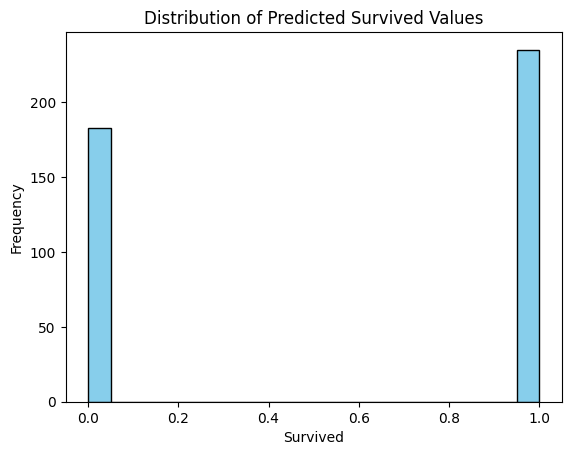

In [59]:
import matplotlib.pyplot as plt

# Example: Histogram of predicted values
plt.hist(submission['Survived'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Survived Values')
plt.show()


In [60]:

verification_df = pd.read_csv('submission.csv')
print(verification_df.head())


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
